In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip3 install -U ucimlrepo

   ---------------------------------------- 167.3/167.3 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: certifi
    Found existing installation: certifi 2019.11.28
    Uninstalling certifi-2019.11.28:
      Successfully uninstalled certifi-2019.11.28


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
#check which datasets can be imported
from ucimlrepo import fetch_ucirepo, list_available_datasets
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [3]:
#fetch the Adult dataset
dataset = fetch_ucirepo(id=2)

#Access data
adult_data = dataset.data.original

In [4]:
#converting dataset into Pandas dataframe
adult = pd.DataFrame(data=adult_data,columns=dataset.headers)
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Ass 1: Prediction task is to determine whether a person makes over 50K a year.

# Ass 1: Understanding the variables

In [16]:
# Age: age of the individual
# workclass: type of organization the person works in or if he is self-employed
# fnlwgt: final weight. gives the number of people that the census believes the entry represents in the population.
# education: education level of the person
# education-num: education column label encoded number
# marital-status: marital status of the person
# occupation: professional role of the person
# relationship: person's relationship status in the family
# race: ethnicity
# sex: gender
# capital-gain: any profit made by the person that can be counted as an additional income
# capital-loss: any loss incurred by the person
# hours-per-week: how many hours the person works in a week
# native-country: native country of the person
# income: if the income of the person is above or below 50k.

# Ass 2: Initial Exploration

In [31]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [32]:
adult.isnull().sum() #3 coulmns have missing values

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [33]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Generate Hypothesis: Define Hypothesis statements
"Statistical Tests :
Perform statistical tests to validate hypotheses or check for significant differences between groups.
Explain Hypothesis Testing and p-value.What are type 1 and Type 2 errors?and 
apply Statistical test on generated hypothesis"


In [25]:
'''Hypothesis testing: allows us to make assumptions about a full population based on a representative sample. 
In most cases, it is just impossible to observe the entire population in order to comprehend its properties. 
The only option is to select a random sample and use statistics to analyse it.'''

''''''

'Hypothesis testing: allows us to make assumptions about a full population based on a representative sample. \nIn most cases, it is just impossible to observe the entire population in order to comprehend its properties. \nThe only option is to select a random sample and use statistics to analyse it.'

In [ ]:
#H0 : There is no difference in average age between men and women
#Ha : There is a difference in average age between men and women
#Age is continuous and comparison is between 2 groups, the possible tests are Mann Whitney Test, Paired T-test, 2 Sample T-test for equal variances, and 2 Sample T-test for unequal variances.

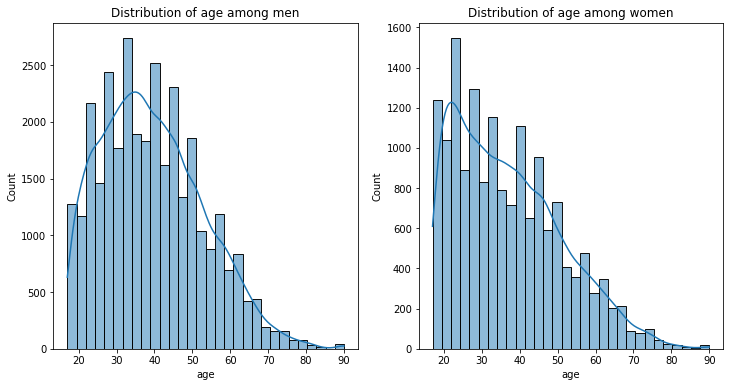

In [14]:
male_age = adult[adult['sex']=='Male']['age']
female_age = adult[adult['sex']=='Female']['age']

#We check if age for men and women follow normal distribution using visual histograms
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(male_age,bins=30,kde=True)
plt.title('Distribution of age among men')

plt.subplot(1,2,2)
sns.histplot(female_age,bins=30,kde=True)
plt.title('Distribution of age among women')

plt.show()

In [32]:
print('average male age: ',male_age.mean())
print('average female age: ',female_age.mean())

average male age:  39.49439509954058
average female age:  36.92798913043478


In [33]:
#We check if age for men and women follow normal distribution using shapiro test
H0 = 'age is normally distributed for men and women'
Ha = 'age is not normally distributed for men and women'
alpha = 0.05
from scipy import stats
shapiro_male = stats.shapiro(male_age.sample(n=50,random_state=1))
print(f"Shapiro test statistic for males: W={shapiro_male[0]:.4f}, p-value={shapiro_male[1]:.4f}")
shapiro_female = stats.shapiro(female_age.sample(n=50,random_state=1))
print(f"Shapiro test statistic for female: W={shapiro_female[0]:.4f}, p-value={shapiro_female[1]:.4f}")

Shapiro test statistic for males: W=0.9316, p-value=0.0064
Shapiro test statistic for female: W=0.9316, p-value=0.0064


In [ ]:
#By visualizations and also with a p value <0.05 for both men and women,
#we can reject H0 indicating that age is not normally distributed among men and women.
#So, we go with Mann Whitney test

In [16]:
#Mann Whitney test for Hypothesis that:
#H0 : There is no difference in average age between men and women
#Ha : There is a difference in average age between men and women
stat,p_value = stats.mannwhitneyu(male_age,female_age)
print('Statistics:%.2f,p:%.2f',(stat,p_value))
alpha = 0.05
if p_value<alpha:
    print('Reject H0 i.e There is significant difference between avg age of men and women')
else:
    print('Not enough evidence to reject H0 i.e there is no difference between avg age of men and women')

Statistics:%.2f,p:%.2f (231802174.0, 2.5105579753255444e-109)
Reject H0 i.e There is significant difference between avg age of men and women


In [ ]:
#H0 : hours per week is normal distribution
#Ha : hours per week is not normal distribution

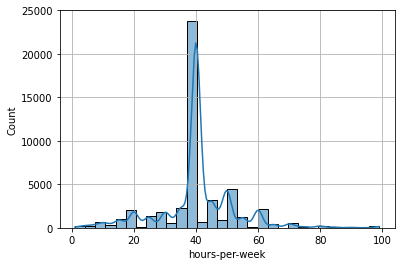

In [28]:
# Get the 'hours-per-week' column
hours_per_week = adult['hours-per-week']

sns.histplot(hours_per_week,bins=30,kde=True)
plt.grid(True)

In [12]:
print('median : ',adult['hours-per-week'].median())
print('mode : ',adult['hours-per-week'].mode())

median :  40.0
mode :  0    40
dtype: int64


In [30]:
shapiro_hours_per_week = stats.shapiro(hours_per_week.sample(n=50,random_state=1))
print(f'Shapiro test statistic value: {shapiro_hours_per_week[0]:.4f},p-value: {shapiro_hours_per_week[1]:.4f}')

Shapiro test statistic value: 0.9354,p-value: 0.0089


In [20]:
ks_hours_per_week = stats.kstest(hours_per_week,'norm')
print(f"test-statistic value: {ks_hours_per_week[0]:.4f},p-value: {ks_hours_per_week[1]:.4f}")

test-statistic value: 0.9971,p-value: 0.0000


In [ ]:
#Through the histogram we infer that hours-per-week is normally distributed but our hypothesis testing using shapiro and kolmogorov-smirnov test result in a p-value<0.05 forcing us to reject the H0.
#So we conclude that this might be the case of type 1 error where actually H0 is true but our research rejects it.